# Self-Correlation

In [25]:
!pip install yfinance

  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.4 requires pathlib, which is not installed.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.


#### Downloading a timeseries dataset of MSFT price movement

In [40]:
%matplotlib inline
from matplotlib.pylab import plt
import pandas as pd
import numpy as np

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
from statsmodels.tsa import stattools

import pandas_datareader.wb as web
start = pd.Timestamp('2017-8-26')
end = pd.Timestamp('2022-8-26')

import yfinance as yf
yahoo = yf.download('MSFT', start, end)

Populating the interactive namespace from numpy and matplotlib


C:\Users\barry\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:159: UserWarning: pylab import has clobbered these variables: ['grid']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


[*********************100%***********************]  1 of 1 completed


In [42]:
yahoo.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2017-08-25,72.860001,73.349998,72.480003,72.820000,68.425293,12794300
2017-08-28,73.059998,73.089996,72.550003,72.830002,68.434700,14569700
2017-08-29,72.250000,73.160004,72.050003,73.050003,68.641411,11478400
2017-08-30,73.010002,74.209999,72.830002,74.010002,69.543465,16897800
2017-08-31,74.029999,74.959999,73.800003,74.769997,70.257607,27652800


# Time series relate to themselves

...But first, let's look at the auto correlation function on a dummy data

### Let's start with white noise

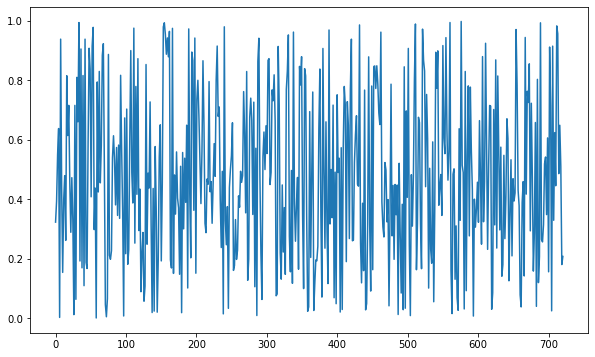

In [43]:
grid = np.linspace(0, 720, 500)
noise = np.random.rand(500)
result_curve =  noise
plt.plot(grid, result_curve)

C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


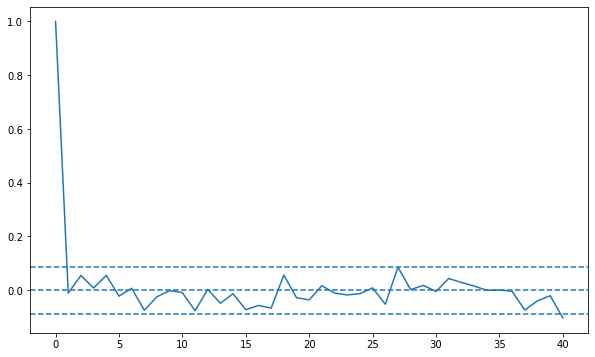

In [44]:
acf_result = stattools.acf(result_curve)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

#### Question: What does ACF means? How to read the graph?

A: Every x-axis is a lagtime, and the value is the correlation between the data in the lagged time to the present data. For example, in time-4 the value on the ACF graph is almost 0.2. This means that the X_{t-4} is correlated relatively strongly with the present X_{t}.

We want to take the last strongly correlated laggedtime to be our model parameter for, for example, AR or MA or ARIMA.

### How about a periodic function?

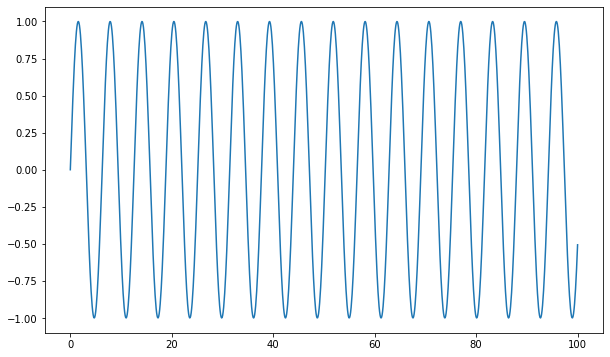

In [45]:
grid = np.linspace(0, 100, 1000)
sin5 = np.sin(grid)
result_curve = sin5 
plt.plot(grid, result_curve)

C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


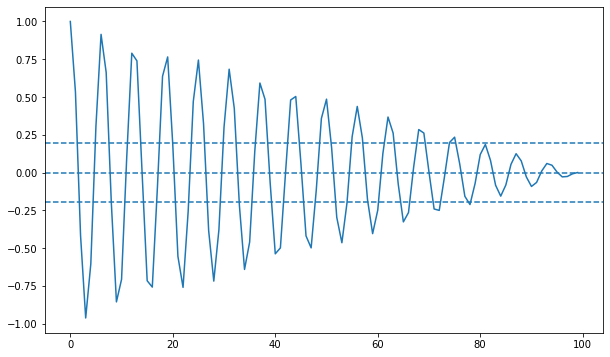

In [46]:
grid = np.linspace(0, 100, 100)
sin5 = np.sin(grid)
result_curve = sin5 

acf_result = stattools.acf(result_curve, nlags = 100)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(result_curve)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(result_curve)),linestyle='--')

### Now let's look at a real example

<AxesSubplot:xlabel='Date'>

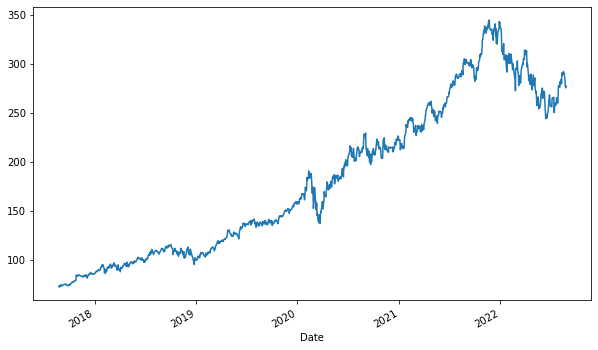

In [49]:
yahoo.Open.plot()

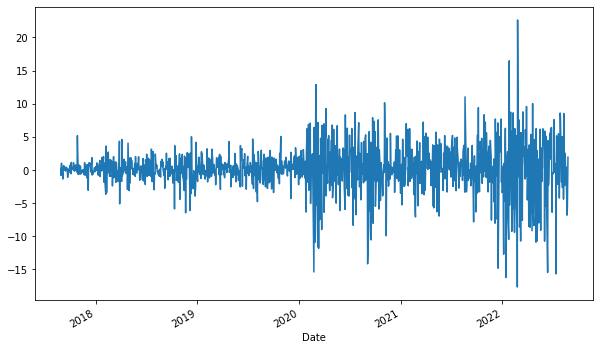

In [47]:
diff_yahoo = yahoo.Open - yahoo.Open.shift()
diff_yahoo.plot()
diff_yahoo.dropna(inplace = True)

C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


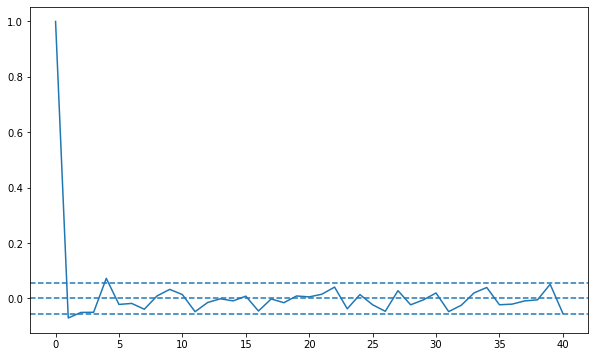

In [51]:
acf_result = stattools.acf(diff_yahoo)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(diff_yahoo)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(diff_yahoo)),linestyle='--')

### You're probably starting to wonder whether this is actually useful...Here's a better real-world example

In [52]:
air_passengers = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)

<AxesSubplot:xlabel='Month'>

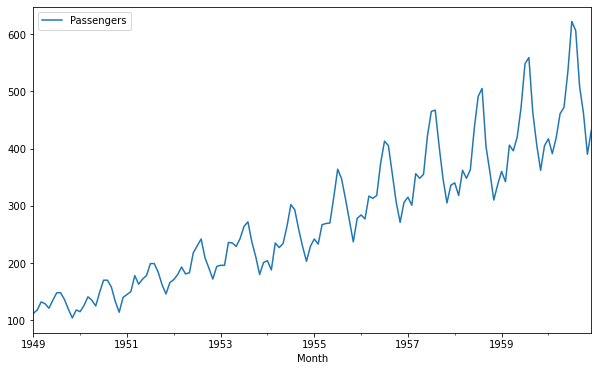

In [53]:
air_passengers.plot()

C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


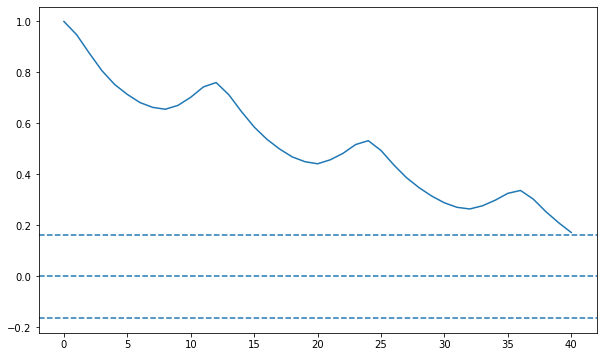

In [54]:
acf_result = stattools.acf(air_passengers)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(air_passengers)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(air_passengers)),linestyle='--')

### Hmmm, that looks meaningful but worrying

We need to log transform and differentiate first

<AxesSubplot:xlabel='Month'>

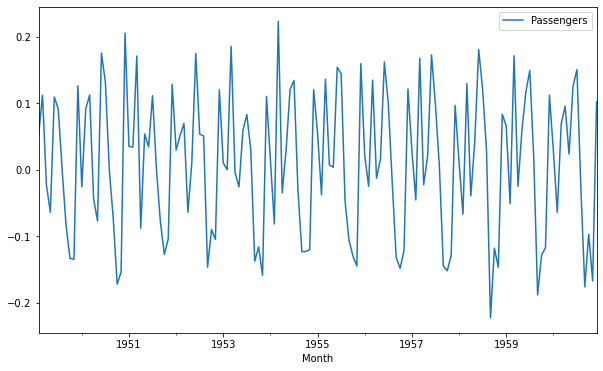

In [62]:
log_air_passengers = np.log(air_passengers)
log_air_passengers_diff = log_air_passengers - log_air_passengers.shift()
log_air_passengers_diff.dropna(inplace = True)
log_air_passengers_diff.plot()

C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:657: FutureWarning: The default number of lags is changing from 40 tomin(int(10 * np.log10(nobs)), nobs - 1) after 0.12is released. Set the number of lags to an integer to  silence this warning.
  warnings.warn(
C:\Users\barry\anaconda3\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


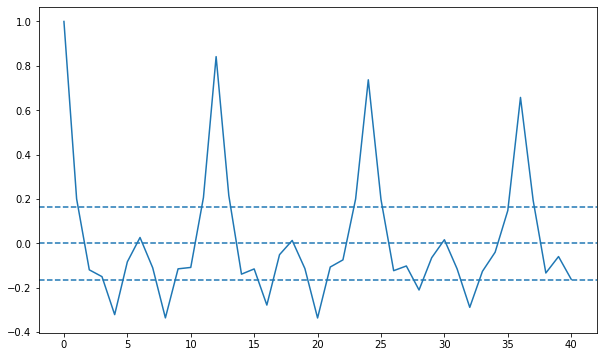

In [64]:
acf_result = stattools.acf(log_air_passengers_diff)
plt.plot(acf_result)
plt.axhline(y=0,linestyle='--')
plt.axhline(y=-1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')
plt.axhline(y=1.96/np.sqrt(len(log_air_passengers_diff)),linestyle='--')

#### How to decide from above graph? 

Should we choose lagged time 4 or 8 or 12 or 24 for our AR or MA parameter?

*Look at AIC score. We should prefer model with good goodness of fit but lesser parameters, so lesser lagged time.

# Talking about Trend & Seasonality

In [65]:
import statsmodels
print(statsmodels.__version__)
print(np.__version__)
print(pd.__version__)

0.12.2
1.20.1
1.4.3


## Let's start with some informal exploration

In [138]:
air_passengers = pd.read_csv("data/AirPassengers.csv", header = 0, parse_dates = [0], names = ['Month', 'Passengers'], index_col = 0)

### How does it make sense to structure this data?

In [139]:
air_passengers.head()

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [140]:
air_passengers = air_passengers.to_period()

In [141]:
air_passengers['1950-06-01':'1950-06-03']

,Passengers
Month,
1950-06,149


### How can we get a sense of this time series?

<AxesSubplot:xlabel='Month'>

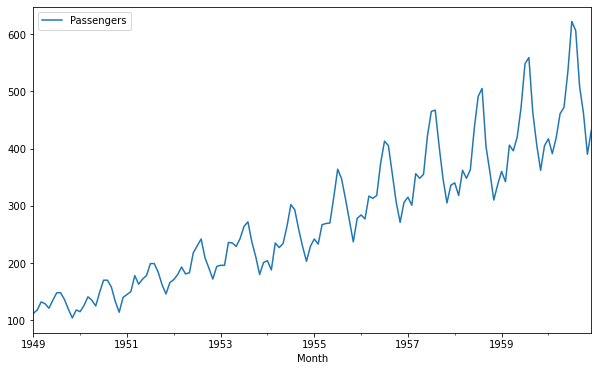

In [142]:
air_passengers.plot()

In [143]:
# first thing we look at for a time series when we want to use common analysis techniques:
# is it stationary: constant mean, constant variance, autocovariance does not depend on time

### Have we got a time independent mean?

<AxesSubplot:xlabel='Month'>

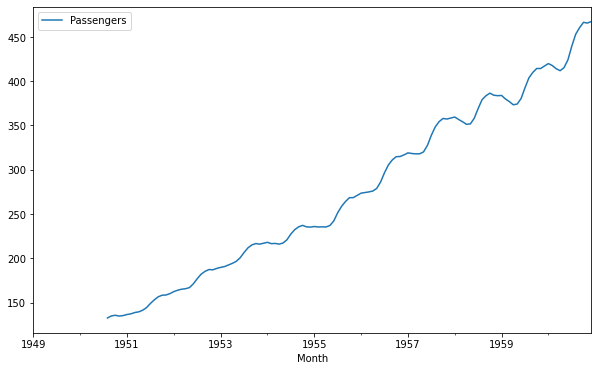

In [144]:
# first test, informally, plot the moving average
air_passengers.rolling(window = 20).mean().plot()

### Have we got a time independent variance?

<AxesSubplot:xlabel='Month'>

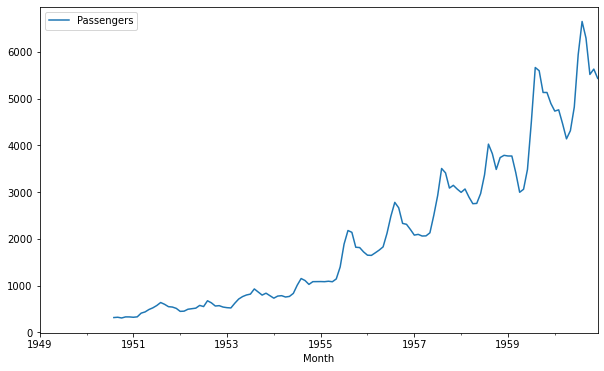

In [145]:
# Can you plot the variance?
air_passengers.rolling(window = 20).var().plot()

### How does sizing your window affect your results?

<AxesSubplot:xlabel='Month'>

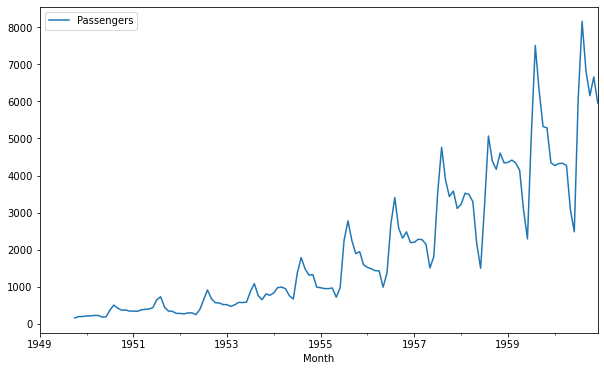

In [146]:
# Can you plot the variance?
air_passengers.rolling(window = 10).var().plot()

<AxesSubplot:xlabel='Month'>

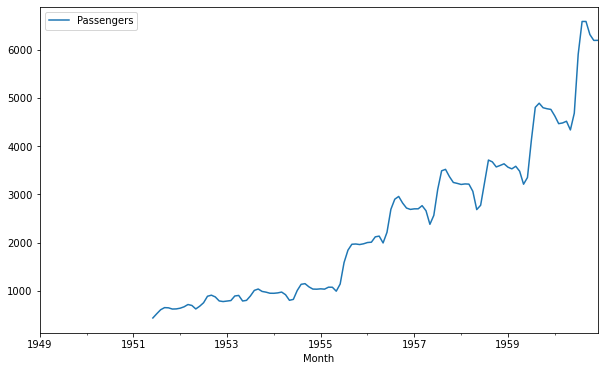

In [147]:
# Can you plot the variance?
air_passengers.rolling(window = 30).var().plot()

### How should you size your window?

# More formally testing for stationarity

In [148]:
# next more formally apply the Dickey-Fuller test
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(air_passengers.Passengers, autolag = 'AIC')

In [149]:
dftest
# What do these numbers mean?

(0.8153688792060508,
 0.991880243437641,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [151]:
# Importing required modules
from pmdarima.arima import ADFTest
 
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(air_passengers.Passengers)

(0.01, False)

#### What do these numbers mean? Let's take a look at statsmodels documentation
Significance in adf_test means stationarity. For false values, it means we get insignificant results, hence the necessity to differentiate to achieve stationarity.

### Can we write a function to output these #s sensibly?
Hint: check out statsmodels.sourceforge.net/devel/generated/statsmodels.tsa.stattools.adfuller.html

### Are we stuck not doing any analysis now that our time series is not stationary?

Hint: no.
How can we make it stationary?
Why is it non-stationary (2 reasons)

<AxesSubplot:xlabel='Month'>

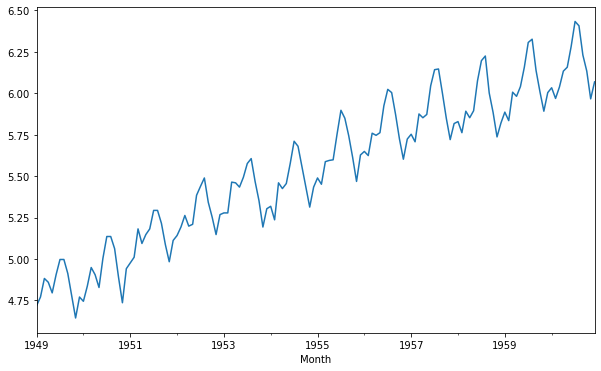

In [152]:
# First let's get rid of the 'trend' contribution to the time series not being stationary
# One method to get rid of a trend is to do a power or log transformation that punishes larger values
# more than smaller values
log_passengers = air_passengers.Passengers.apply(lambda x: np.log(x))
log_passengers.plot()

<AxesSubplot:xlabel='Month'>

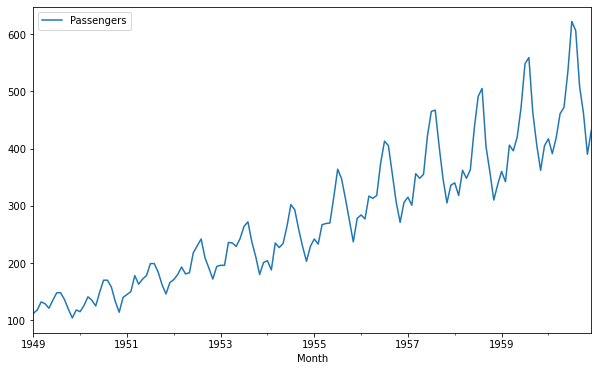

In [153]:
# This reduces the variance in variance as opposed to the original trend
air_passengers.plot()

<AxesSubplot:xlabel='Month'>

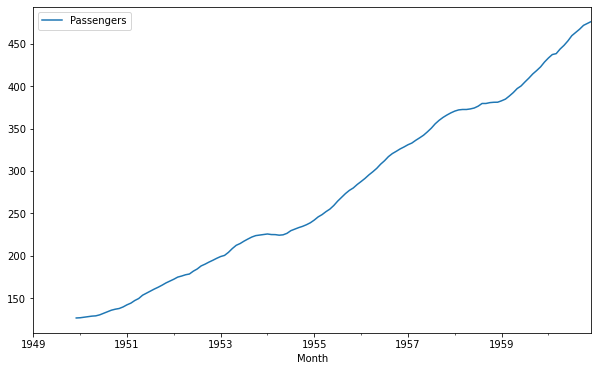

In [154]:
# However there is still a trend we need to remove
# Let's calculate a rolling mean
# Experiment with window size
air_passengers.rolling(window = 12).mean().plot()

<AxesSubplot:xlabel='Month'>

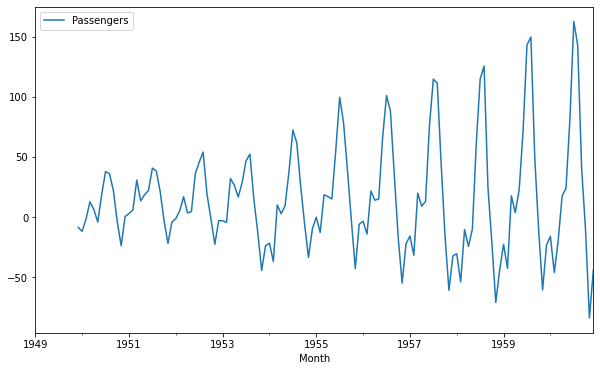

In [155]:
# What if we subtract this rolling mean from the original series?
rolling_mean = air_passengers.rolling(window = 12).mean()
passengers_detrended = air_passengers - rolling_mean
passengers_detrended.plot()

In [156]:
# Exercise: try detrending after taking the log. How does that look?

<AxesSubplot:xlabel='Month'>

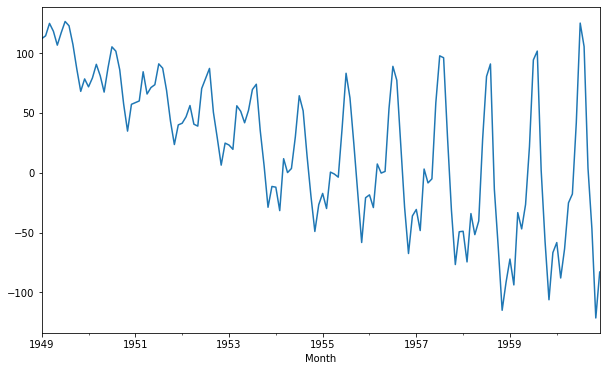

In [157]:
# Now let's use a regression rather than a rolling mean to detrend
from statsmodels.regression.linear_model import OLS
model = OLS(air_passengers.Passengers.values, list(range(len(air_passengers.values))))
result = model.fit()
result.params
fit = pd.Series(result.predict(list(range(len(air_passengers.values)))), index = air_passengers.index)

passengers_detrended = air_passengers.Passengers - fit
passengers_detrended.plot()

In [158]:
# Now let's take a look at seasonality


In [159]:
# When might a rolling average work better/worse than a regression?

In [160]:
# How might we be able to eliminate both trend and seasonality?
# Looking for two answers...

<AxesSubplot:xlabel='Month'>

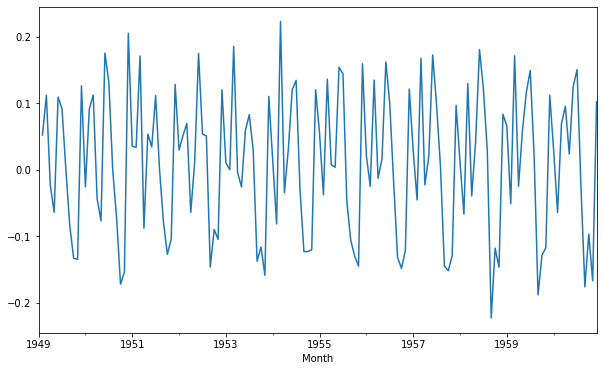

In [161]:
# One common technique is differencing, let's start with log_passengers
log_passengers_diff = log_passengers - log_passengers.shift()
log_passengers_diff.plot()

In [162]:
# Let's again test for stationarity with a gut level check.
# And let's write a function to do it since this seems like something we'll have to do a lot

In [163]:
log_passengers = log_passengers.to_timestamp()

In [164]:
from statsmodels.tsa.seasonal import seasonal_decompose

log_passengers.interpolate(inplace = True)
decomposition = seasonal_decompose(log_passengers)

In [165]:
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

<AxesSubplot:xlabel='Month'>

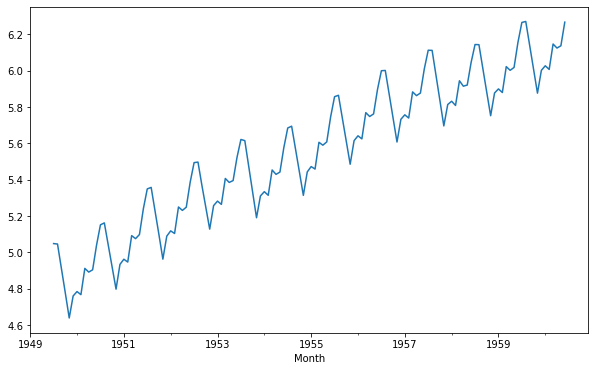

In [166]:
(seasonal+trend).plot()

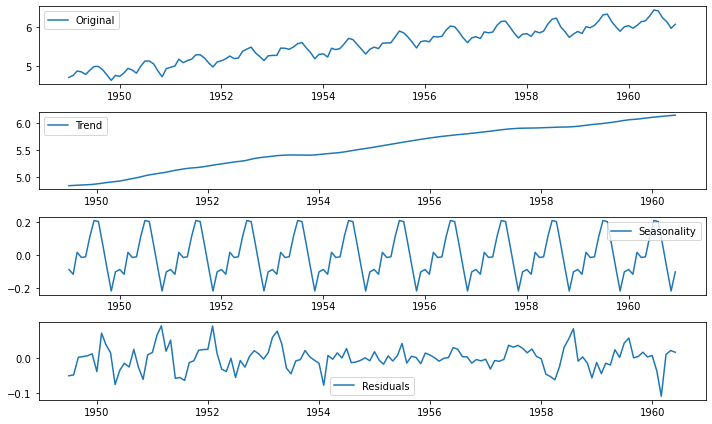

In [167]:

plt.subplot(411)
plt.plot(log_passengers, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()